In [5]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df_num = pd.read_csv('./df_num.csv')

Percent Distribution of Potential Fraud class:- 
 No     61.878931
Yes    38.121069
Name: PotentialFraud, dtype: float64


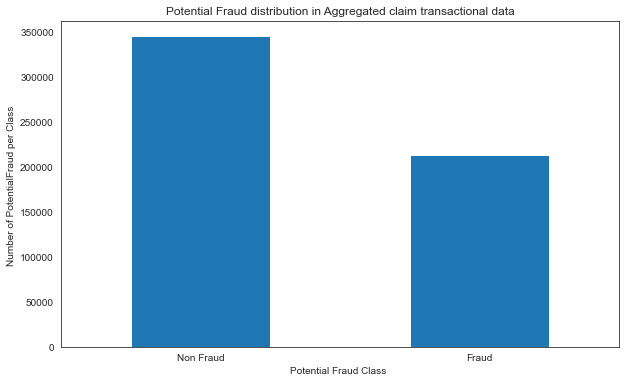

In [6]:
sns.set_style('white',rc={'figure.figsize':(12,8)})
count_classes = pd.value_counts(df_num['PotentialFraud'], sort = True)
print("Percent Distribution of Potential Fraud class:- \n",count_classes*100/len(df_num))
LABELS = ["Non Fraud", "Fraud"]
#Drawing a barplot
count_classes.plot(kind = 'bar', rot=0,figsize=(10,6))

#Giving titles and labels to the plot
plt.title("Potential Fraud distribution in Aggregated claim transactional data")
plt.xticks(range(2), LABELS)
plt.xlabel("Potential Fraud Class ")
plt.ylabel("Number of PotentialFraud per Class ")

plt.savefig('PotentialFraudDistributionInMergedData')

In [34]:
res=[]
for i in range(1000,38000,1000):
    x=df_num[(df_num['InscClaimAmtReimbursed']>=(i-1000)) & 
             (df_num['InscClaimAmtReimbursed']<=i) ]['PotentialFraud'].value_counts('yes')[0]
    res.append([i,x])

In [42]:
pd_res=pd.DataFrame(res)
pd_res.rename(columns={0:'ReimRange',
                       1:'FraudPercentage'}, inplace = True)

In [43]:
pd_res

,ReimRange,FraudPercentage
0,1000,0.633447
1,2000,0.618133
2,3000,0.575078
3,4000,0.523957
4,5000,0.567446
5,6000,0.564595
6,7000,0.575290
7,8000,0.575935
8,9000,0.572648
9,10000,0.580371


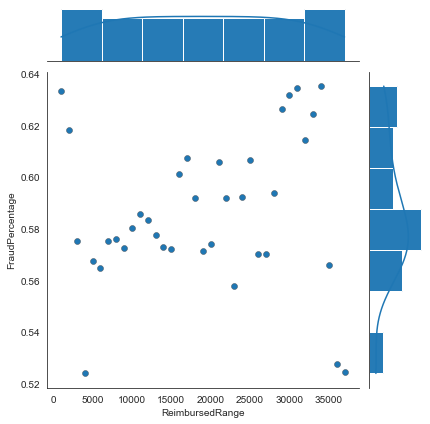

In [59]:

ax=sns.jointplot(data=pd_res,x='ReimRange',
                       y='FraudPercentage')
ax.plot(sns.scatterplot, sns.histplot, alpha=.7, edgecolor=".2", linewidth=.5)
ax.plot_marginals(sns.histplot, kde=True)
ax.set_axis_labels(xlabel='ReimbursedRange',ylabel='FraudPercentage')


plt.savefig('ReimbursedRange&FraudPercentage')#FraudPercentage=Fraud/(NonFraud+Fraud)